# <center>Heart Disease Research Part II</center>

In this project, you’ll investigate some data from a sample patients who were evaluated for heart disease at the Cleveland Clinic Foundation. The data was downloaded from the UCI Machine Learning Repository and then cleaned for analysis. The principal investigators responsible for data collection were:

* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

The data has been saved as a dataframe named heart in script.py. It contains the following variables:

* `age`: age in years
* `sex`: sex assigned at birth; 'male' or 'female'
* `trestbps`: resting blood pressure in mm Hg
* `chol`: serum cholesterol in mg/dl
* `cp`: chest pain type ('typical angina', 'atypical angina', 'non-anginal pain', or 'asymptomatic')
* `exang`: whether the patient experiences exercise-induced angina (1: yes; 0: no)
* `fbs`: whether the patient’s fasting blood sugar is >120 mg/dl (1: yes; 0: no)
* `thalach`: maximum heart rate achieved in exercise test
* `heart_disease`: whether the patient is found to have heart disease ('presence': diagnosed with heart disease; 'absence': no heart disease)

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
# load data
heart = pd.read_csv('heart_disease.csv')

# Step 1
* Inspect the first few rows of data using the `.head()` method.

In [5]:
heart.head()

,age,sex,trestbps,chol,cp,exang,fbs,thalach,heart_disease
0,63.0,male,145.0,233.0,typical angina,0.0,1.0,150.0,absence
1,67.0,male,160.0,286.0,asymptomatic,1.0,0.0,108.0,presence
2,67.0,male,120.0,229.0,asymptomatic,1.0,0.0,129.0,presence
3,37.0,male,130.0,250.0,non-anginal pain,0.0,0.0,187.0,absence
4,41.0,female,130.0,204.0,atypical angina,0.0,0.0,172.0,absence


# Step 2
Each of the patients in this dataset underwent an exercise test, during which their heart rate was monitored. For each patient, `thalach` gives us the highest heart rate that the patient achieved during this test.


Is `thalach` associated with whether or not a patient will ultimately be diagnosed with heart disease? Use `sns.boxplot()` to plot side by side box plots of `thalach` for patients who were and were not diagnosed with heart disease (indicated by the `heart_disease` variable). Do you think there is a relationship between these variables?`

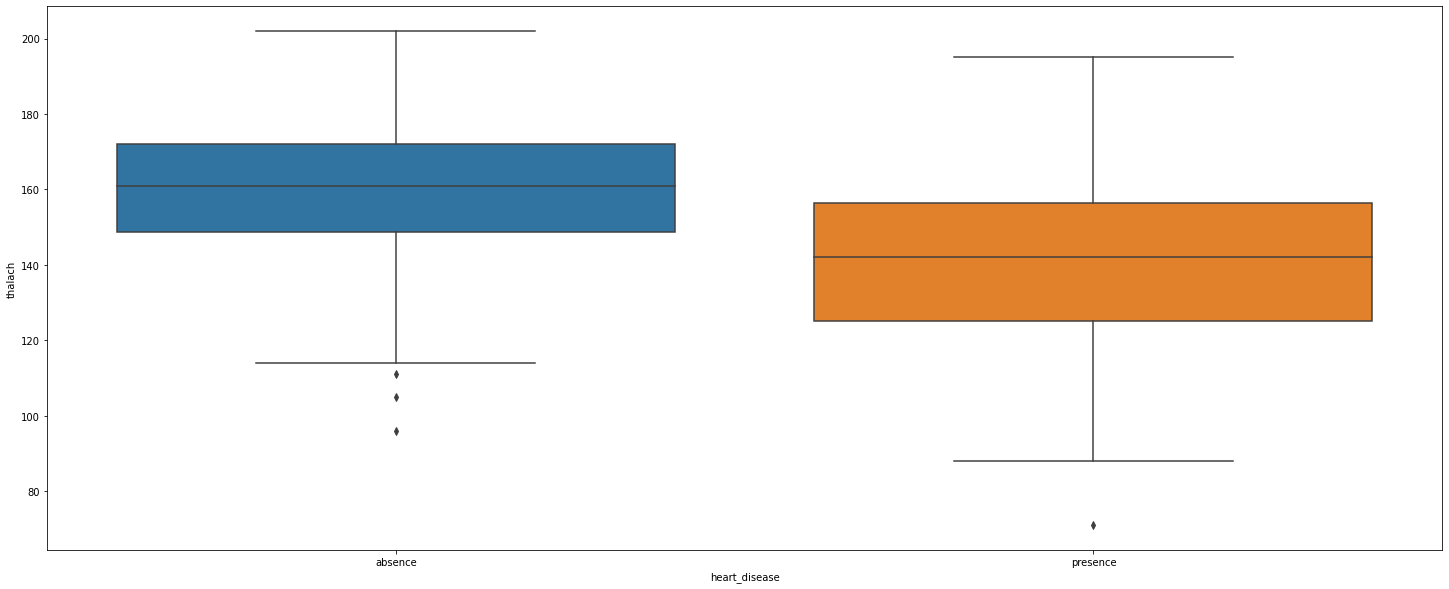

In [16]:
plt.figure(figsize=(25,10))
sns.boxplot(x=heart.heart_disease, y=heart.thalach)
plt.show()

# Step 3

In order to investigate this question further, save the values for `thalach` among patients who were diagnosed with heart disease as a variable named `thalach_hd`. Then save the values of `thalach` among patients who were not diagnosed with heart disease as `thalach_no_hd`.

In [19]:
thalach_hd = heart.thalach[heart.heart_disease == 'absence']
thalach_no_hd =  heart.thalach[heart.heart_disease == 'presence']

# Step 4

Calculate and print the difference in mean `thalach` for patients diagnosed with heart disease compared to patients without heart disease. Then do the same for the median difference.

In [36]:
mean_thalach_hd = np.mean(thalach_hd)
mean_thalach_no_hd = np.mean(thalach_no_hd)
median_thalach_hd = np.median(thalach_hd)
median_thalach_no_hd = np.median(thalach_no_hd)
diff_mean = abs(mean_thalach_hd - mean_thalach_no_hd)
diff_median = abs(median_thalach_hd - median_thalach_no_hd)
mean_thalach_hd, mean_thalach_no_hd, median_thalach_hd, median_thalach_no_hd, diff_mean, diff_median

(158.3780487804878, 139.25899280575538, 161.0, 142.0, 19.11905597473242, 19.0)

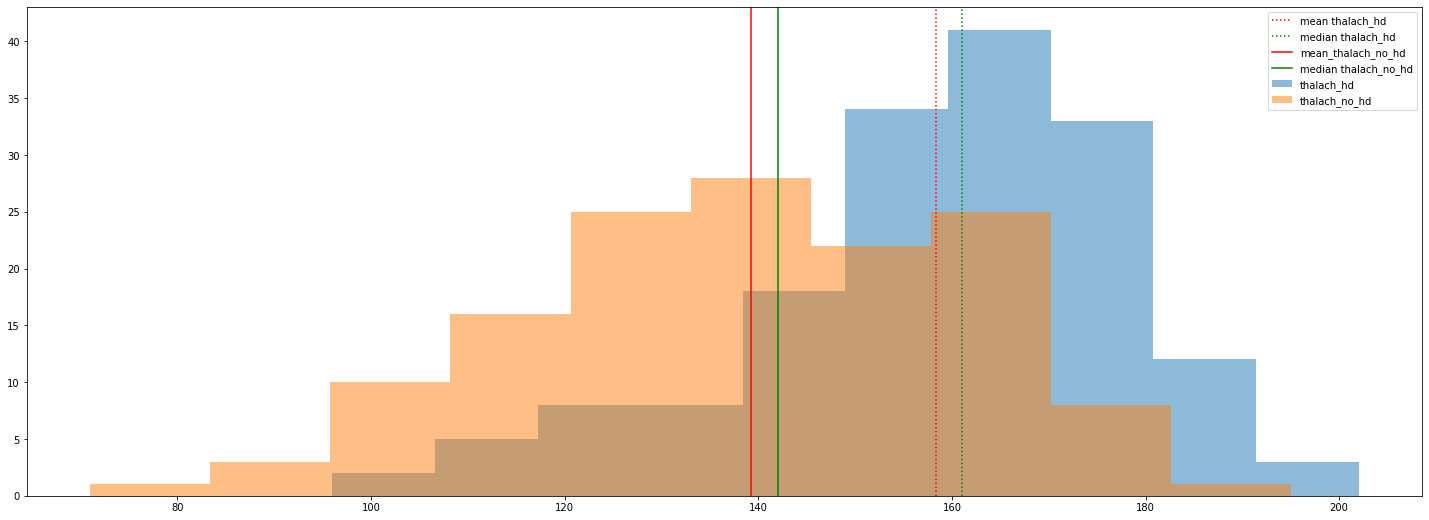

In [39]:
plt.figure(figsize=(25,9))

plt.hist(thalach_hd, alpha=.5, label='thalach_hd')
plt.axvline(mean_thalach_hd, color='red', label='mean thalach_hd', linestyle='dotted')
plt.axvline(median_thalach_hd, color='green', label='median thalach_hd', linestyle='dotted')

plt.hist(thalach_no_hd, alpha=.5, label='thalach_no_hd')
plt.axvline(mean_thalach_no_hd, color='red', label='mean_thalach_no_hd')
plt.axvline(median_thalach_no_hd, color='green', label='median thalach_no_hd')

plt.legend()
plt.show()

# Step 5

We’d like to find out if the average `thalach` of a heart disease patient is significantly different from the average `thalach` for a person without heart disease.

Import the statistical test from `scipy.stats` that we would use to test the following null and alternative hypotheses:

* Null: The average thalach for a person with heart disease is equal to the average thalach for a person without heart disease.
* Alternative: The average thalach for a person with heart disease is NOT equal to the average thalach for a person without heart disease.


In [41]:
from scipy.stats import ttest_ind

# Step 6

Run the hypothesis test from task 5 and print out the p-value. Using a significance threshold of 0.05, is there a significant difference in average thalach for people with heart disease compared to people with no heart disease?

In [42]:
tstat, pval = ttest_ind(thalach_hd, thalach_no_hd)
pval

3.456964908430172e-14

# Step 7
Using the same process, investigate at least one other quantitative variable. Options include age, trestbps (resting blood pressure), and chol (cholesterol). Are any of these variables also significantly associated with heart disease?

Note: before every new plot that you make, be sure to use plt.clf() to clear the previous plot first, so that plots don’t get layered on top of each other.

In [49]:
val1 = heart.age[heart.heart_disease == 'absence']
val2 = heart.age[heart.heart_disease == 'presence']
tstat, pval = ttest_ind(val1, val2)
pval

8.955636917529706e-05

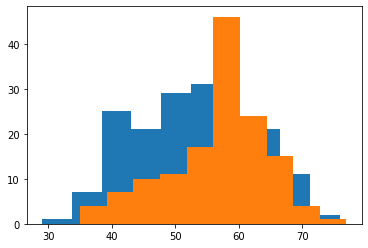

In [50]:
plt.hist(val1)
plt.hist(val2)
plt.show()

In [51]:
val1 = heart.trestbps[heart.heart_disease == 'absence']
val2 = heart.trestbps[heart.heart_disease == 'presence']
tstat, pval = ttest_ind(val1, val2)
pval

0.008548268928594928

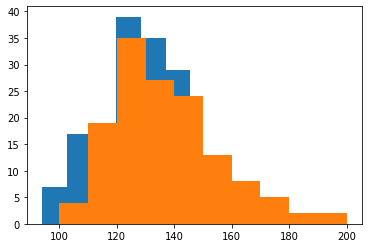

In [52]:
plt.hist(val1)
plt.hist(val2)
plt.show()

In [53]:
val1 = heart.chol[heart.heart_disease == 'absence']
val2 = heart.chol[heart.heart_disease == 'presence']
tstat, pval = ttest_ind(val1, val2)
pval

0.13914167020436527

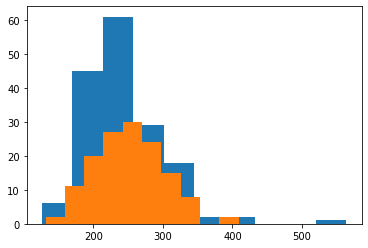

In [54]:
plt.hist(val1)
plt.hist(val2)
plt.show()

# <center>Chest Pain and Max Heart Rate</center>
# Step 8


Next, let’s investigate the relationship between thalach (maximum heart rate achieved during exercise) and the type of heart pain a person experiences. Create a set of side-by-side box plots of thalach for each chest pain type in the data. Make sure to use plt.clf() to clear the previous plots first!

Are there any chest pain types for which average thalach is significantly higher or lower (compared to other chest pain types)?


<AxesSubplot:xlabel='cp', ylabel='thalach'>

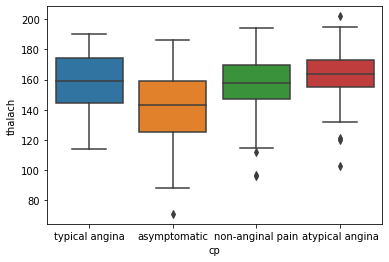

In [55]:
sns.boxplot(x=heart.cp, y=heart.thalach)

# Step 9


To investigate this further, save the values of thalach for patients who experienced each type of chest pain as thalach_typical, thalach_asymptom, thalach_nonangin, and thalach_atypical, respectively.

In [56]:
heart.cp.unique()

array(['typical angina', 'asymptomatic', 'non-anginal pain',
       'atypical angina'], dtype=object)

In [57]:
thalach_typical = heart.thalach[heart.cp == 'typical angina']
thalach_asymptom = heart.thalach[heart.cp == 'asymptomatic']
thalach_nonangin = heart.thalach[heart.cp == 'non-anginal pain']
thalach_atypical = heart.thalach[heart.cp == 'atypical angina']

# Step 10

Run a single hypothesis test to address the following null and alternative hypotheses:

Null: People with typical angina, non-anginal pain, atypical angina, and asymptomatic people all have the same average thalach.
Alternative: People with typical angina, non-anginal pain, atypical angina, and asymptomatic people do not all have the same average thalach.
Save the resulting p-value as pval and print it out. Using a significance threshold of 0.05, is there at least one pair of chest pain categories for which people in those categories have significantly different thalach?

In [58]:
from scipy.stats import f_oneway
fstat, pval = f_oneway(thalach_typical, thalach_asymptom, thalach_nonangin, thalach_atypical)
pval

1.9065505247705008e-10

# Step 11

If you completed the previous step correctly, you should have concluded that there is at least one pair of chest pain types (cp) for which people with those pain types have significantly different average max heart rates during exercise (thalach).

Run another hypothesis test to determine which of those pairs are significantly different. Use an overall type I error rate of 0.05 for all six comparisons.

In [60]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_results = pairwise_tukeyhsd(thalach_typical, thalach_asymptom, thalach_nonangin, thalach_atypical, .05)
tukey_results

ModuleNotFoundError: No module named 'statsmodels'

# <center> Heart Disease and Chest Pain</center>
# Step 12

Finally, let’s investigate the relationship between the kind of chest pain a person experiences and whether or not they have heart disease. Create a contingency table of cp and heart_disease and save it as Xtab, then print it out.

# Step 13

Run a hypothesis test for the following null and alternative hypotheses:

Null: There is NOT an association between chest pain type and whether or not someone is diagnosed with heart disease.
Alternative: There is an association between chest pain type and whether or not someone is diagnosed with heart disease.
Save the p-value as pval and print it out. Using a significance threshold of 0.05, is there a significant association between chest pain type and whether or not someone is diagnosed with heart disease?

# <center> Further Exploration</center>

# Step 14

Congratulations! You’ve used a sample of data to understand how health related outcomes are associated with heart disease. Now that you’ve gotten your feet wet, there are a number of additional variables in this dataset that we haven’t looked at yet! If you want additional practice, use this space to continue your investigation. What other variables might be predictive of heart disease? Can you identify which hypothesis test to use for each variable?

As a reminder, the variables in this data are:

* age: age in years
* sex: sex assigned at birth; 'male' or 'female'
* trestbps: resting blood pressure in mm Hg
* chol: serum cholesterol in mg/dl
* cp: chest pain type ('typical angina', 'atypical angina', 'non-anginal pain', or 'asymptomatic')
* exang: whether the patient experiences exercise-induced angina (1: yes; 0: no)
* fbs: whether the patient’s fasting blood sugar is >120 mg/dl (1: yes; 0: no)
* thalach: maximum heart rate achieved in exercise test
* heart_disease: whether the patient is found to have heart disease ('presence': diagnosed with heart disease; 'absence': no heart disease)